# Gradient Boosting

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/software_defect.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/software_defect.parquet')

In [3]:
y_train = train.defects
X_train = train.drop(columns=['defects'])

In [4]:
y_validation = validation.defects
X_validation = validation.drop(columns=['defects'])

In [9]:
exploratory_depths =[2, 3, 4, 5, 6]
exploratory_estimators = [50, 100, 200, 400, 500]
exploratory_learn_rate = [0.05, 0.1, 0.5, 0.7]

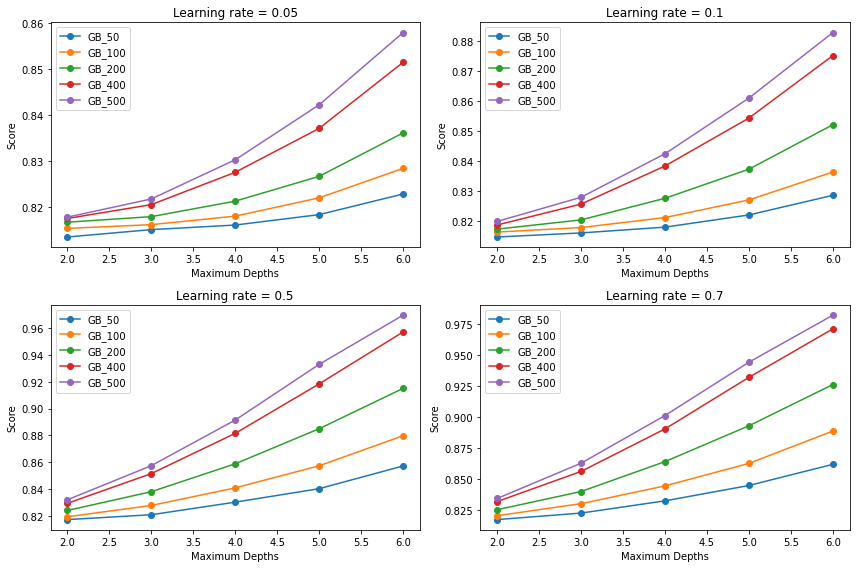

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 0].set_xlabel('Maximum Depths')
axs[0, 0].set_ylabel('Score')
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[0, 1].set_xlabel('Maximum Depths')
axs[0, 1].set_ylabel('Score')
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 0].set_xlabel('Maximum Depths')
axs[1, 0].set_ylabel('Score')
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()
axs[1, 1].set_xlabel('Maximum Depths')
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [7]:
max_depth = [3, 4, 5, 6, 7]
n_estimators = [200, 300, 400, 500, 600, 700, 800]
learn_rate = [0.1, 0.3, 0.5, 0.7]

In [8]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('GB_'+str(n)+'_'+str(d)+'_'+str(l))

In [34]:
metrics = classification(models_list, names_list, '../../../data/model_output/metrics/software_defect/gradient_boosting.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
GB_200_3_0.1,35.294318,0.799199,0.793118,-0.760864
GB_200_3_0.3,35.188926,0.810421,0.790316,-2.480759
GB_200_3_0.5,34.888906,0.820473,0.786226,-4.174031
GB_200_3_0.7,35.096380,0.824196,0.779411,-5.433759
GB_200_4_0.1,46.485725,0.807526,0.793082,-1.788619
...,...,...,...,...
GB_800_6_0.7,269.869060,0.999880,0.721751,-27.816199
GB_800_7_0.1,319.400814,0.975330,0.767082,-21.351550
GB_800_7_0.3,317.906740,0.999529,0.742510,-25.714062
GB_800_7_0.5,324.026590,0.999994,0.730289,-26.970695


In [37]:
metrics[metrics['delta%']>-10].sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
GB_400_3_0.1,64.199370,0.805341,0.793168,-1.511533
GB_200_3_0.1,35.294318,0.799199,0.793118,-0.760864
GB_300_3_0.1,52.314141,0.802138,0.793115,-1.124929
GB_200_4_0.1,46.485725,0.807526,0.793082,-1.788619
GB_300_4_0.1,68.951908,0.813595,0.793035,-2.527018
GB_500_3_0.1,90.601365,0.807882,0.793031,-1.838343
GB_600_3_0.1,106.943059,0.810767,0.792647,-2.234988
GB_700_3_0.1,154.645013,0.813433,0.792221,-2.607703
GB_400_4_0.1,94.617022,0.819815,0.792165,-3.372748
GB_200_5_0.1,57.599047,0.820269,0.792045,-3.440875


We choose **GB_200_3_0.1** because all models perform similarly, so we choose the simplest one

In [5]:
test = pd.read_parquet('../../../data/model_input/test_sets/software_defect.parquet')

In [6]:
y_test = test.defects
X_test = test.drop(columns=['defects'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.defects
X_retrain = retrain.drop(columns=['defects'])

In [44]:
model = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1).fit(X_retrain, y_retrain)

In [45]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.7938


In [48]:
dump(model, '../../../data/model_output/models/software_defect/best_gradient_boosting.joblib')

['best_gradient_boosting.joblib']

In [49]:
with open('../../../data/metrics/software_defect/final_AUC.txt', 'a') as f:
    f.write('\nGB, '+ str(auc))

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/software_defect/best_gradient_boosting.joblib')

In [10]:
train_pred = load_mod.predict_proba(X_retrain)[:, 1]
auc_train = roc_auc_score(y_retrain, train_pred)
test_pred = load_mod.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, test_pred)

In [11]:
import time 
time1 = time.time()
GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

In [12]:
with open('../../../data/model_output/metrics/software_defect/final_metrics.txt', 'a') as f:
     f.write(f'\nGB; {time2}; {auc_train}; {auc_test}')